In [12]:
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *


# 设置起始时间和股票池
begin = "2007-01-01"
end = "2019-03-11"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Quantiles = {}
Qt_columns = ['板块', '超额涨跌比', '板块收益'] 


#A_stock_index_data = get_price(security='000001.XSHG', start_date=begin, end_date=end, frequency='daily', fields=["close"], skip_paused=True, fq='pre')
#print A_stock_index_data.index,A_stock_index_data.head()

def get_propotion(date,stock_list,degree=5):
    #stock_list = list(get_all_securities('stock', yesterday).index)
    pct_all =get_price(security = stock_list,end_date=date,fields=['pre_close','close'], count=1, frequency='daily', skip_paused=False,fq='pre')
    percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
    percent_yesterday_df = percent_yesterday_df.dropna(axis=1)
    propotion = len([i for i in percent_yesterday_df.iloc[0] if i >= degree])/len(percent_yesterday_df.iloc[0])
    return propotion
#
def get_DCP_date_distribution(end_date=end,begin_date=begin,days=None):
    print('entering get_DCP_date_distribution',end_date,begin_date,type(days) )
    trader_dates = get_trade_days(begin_date,end_date)
    # 获取行业数据-"sw_l1": 申万一级行业 "sw_l2": 申万二级行业 "sw_l3": 申万三级行业 "jq_l1": 聚宽一级行业 "jq_l2": 聚宽二级行业 "zjw": 证监会行业
    industries_df = get_industries(name="sw_l1")
    
    count = 0
    for yesterday in trader_dates:
        
        everyday_data = pd.DataFrame(index=industries_df.index,columns = Qt_columns)
        everyday_data['板块'] = industries_df['name']
        
        #获取全市场涨跌比例
        stock_list_m = list(get_all_securities('stock', yesterday).index)
        m_propotion = get_propotion(yesterday,stock_list_m)
        
        #获取各个行业的涨跌比例
        for industry_code in ['801790']: #everyday_data.index:
            #try:
            industry_sl = get_industry_stocks(industry_code, yesterday)
            if len(industry_sl)>10:
                i_propotion = get_propotion(yesterday,industry_sl)-m_propotion
                everyday_data.loc[industry_code,'超额涨跌比'] = i_propotion
            else:
                everyday_data.loc[industry_code,'超额涨跌比'] = 0
            #except:
                #print(industry_code,industry_sl)
                #pass
        Quantiles[yesterday] = everyday_data
        count += 1
        if count%30 == 0:
            print(yesterday)
    return Quantiles

def get_industry_distribution(end_date=end,begin_date=begin):
    
    trader_dates = get_trade_days(begin_date,end_date)
    Quantiles = pd.DataFrame(index=trader_dates,columns=['券商'])
    count = 0
    for yesterday in trader_dates:
        #获取全市场涨跌比例
        stock_list_m = list(get_all_securities('stock', yesterday).index)
        m_propotion = get_propotion(yesterday,stock_list_m)
        #industry_sl = get_industry_stocks('801790', yesterday)
        industry_sl = ['000166.XSHE', '000415.XSHE', '000416.XSHE', '000563.XSHE', '000666.XSHE', '000686.XSHE', '000712.XSHE', '000728.XSHE', '000750.XSHE', '000776.XSHE', '000783.XSHE', '002500.XSHE', '002673.XSHE', '002736.XSHE', '002797.XSHE', '300023.XSHE', '600030.XSHG', '600061.XSHG', '600109.XSHG', '600291.XSHG', '600369.XSHG', '600643.XSHG', '600705.XSHG', '600747.XSHG', '600783.XSHG', '600816.XSHG', '600830.XSHG', '600837.XSHG', '600909.XSHG', '600958.XSHG', '600999.XSHG', '601099.XSHG', '601198.XSHG', '601211.XSHG', '601318.XSHG', '601336.XSHG', '601375.XSHG', '601377.XSHG', '601555.XSHG', '601601.XSHG', '601628.XSHG', '601688.XSHG', '601788.XSHG', '601901.XSHG', '603300.XSHG']
        if len(industry_sl)>0:
            i_propotion = get_propotion(yesterday,industry_sl)-m_propotion
            Quantiles.loc[yesterday,'券商'] = i_propotion
            
        else:
            Quantiles.loc[yesterday,'券商'] = 0
        count += 1
        if count%30 == 0:
            print(yesterday)
    return Quantiles
    
Quantiles = get_industry_distribution()
    

#Quantiles = get_DCP_date_distribution(days=Tdays)
#print(Quantiles)
'''
#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中
virtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')
from six import StringIO,BytesIO
#instance_data = StringIO(virtual_IO) 
instance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes
Quantiles=pd.read_csv(instance_data,index_col='date')
print(Quantiles.columns)
'''

2007-02-14
2007-04-04
2007-05-23
2007-07-04
2007-08-15
2007-09-26
2007-11-14
2007-12-26
2008-02-15
2008-03-28
2008-05-14
2008-06-26
2008-08-07
2008-09-19
2008-11-07
2008-12-19
2009-02-10
2009-03-24
2009-05-07
2009-06-22
2009-08-03
2009-09-14
2009-11-03
2009-12-15
2010-01-27
2010-03-17
2010-04-29
2010-06-11
2010-07-28
2010-09-08
2010-11-01
2010-12-13
2011-01-25
2011-03-15
2011-04-28
2011-06-13
2011-07-25
2011-09-05
2011-10-25
2011-12-06
2012-01-19
2012-03-08
2012-04-24
2012-06-07
2012-07-20
2012-08-31
2012-10-19
2012-11-30
2013-01-16
2013-03-06
2013-04-19
2013-06-05
2013-07-22
2013-09-02
2013-10-23
2013-12-04
2014-01-16
2014-03-06
2014-04-18
2014-06-04
2014-07-16
2014-08-27
2014-10-16
2014-11-27
2015-01-12
2015-03-02
2015-04-14
2015-05-27
2015-07-09
2015-08-20
2015-10-12
2015-11-23
2016-01-05
2016-02-23
2016-04-06
2016-05-19
2016-07-04
2016-08-15
2016-09-28
2016-11-16
2016-12-28
2017-02-16
2017-03-30
2017-05-16
2017-06-29
2017-08-10
2017-09-21
2017-11-09
2017-12-21
2018-02-02
2018-03-23

"\n#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中\nvirtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')\nfrom six import StringIO,BytesIO\n#instance_data = StringIO(virtual_IO) \ninstance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes\nQuantiles=pd.read_csv(instance_data,index_col='date')\nprint(Quantiles.columns)\n"

In [30]:
Quantiles.loc[datetime.date(2018,12,17):datetime.date(2019,1,17),:]

,券商
2018-12-17,-0.00300906
2018-12-18,-0.0114943
2018-12-19,-0.0123353
2018-12-20,-0.0176619
2018-12-21,-0.0103729
2018-12-24,-0.0266256
2018-12-25,-0.0193386
2018-12-26,0.00119615
2018-12-27,-0.0112139
2018-12-28,0.0248201


In [ ]:
datetime.date(2007, 1, 8)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


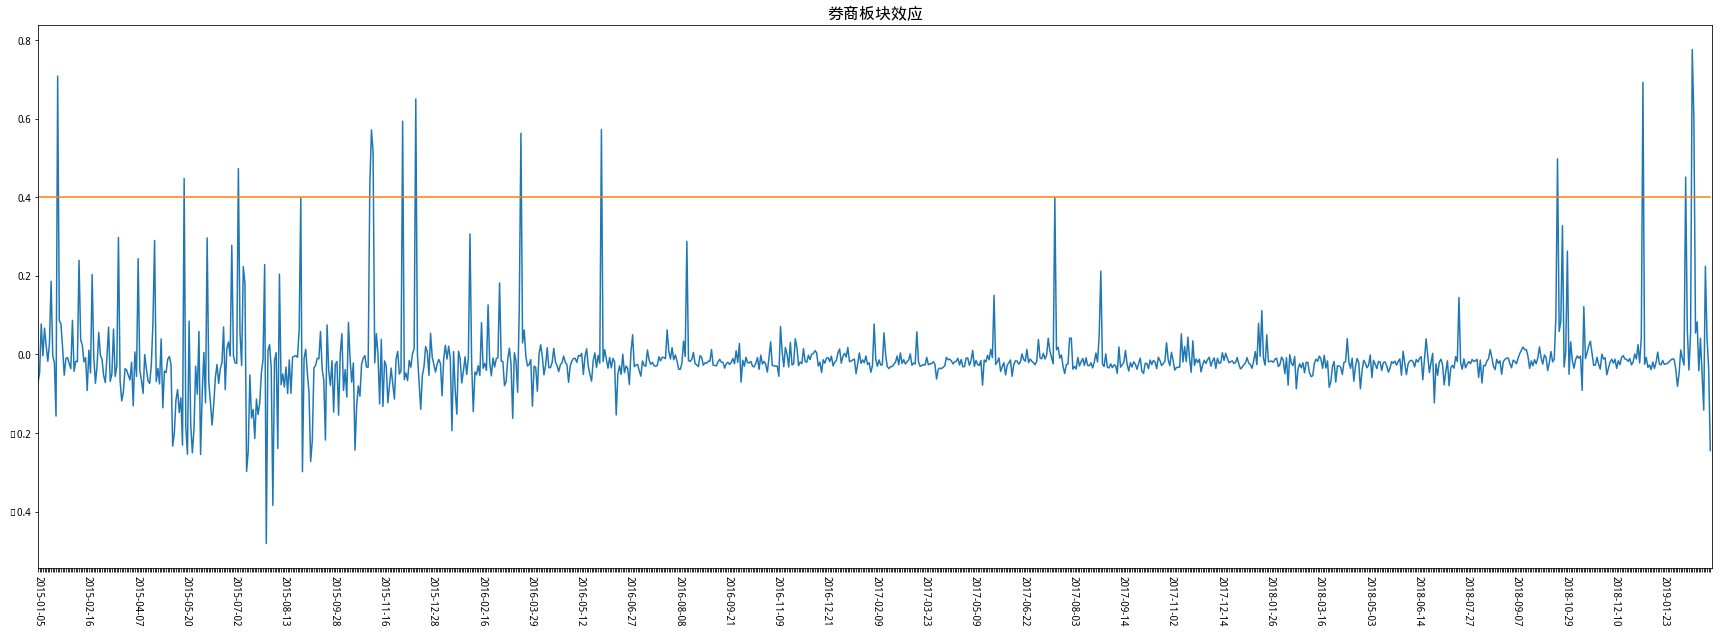

In [66]:
Quantiles_plot=Quantiles.loc[datetime.date(2015,1,1):datetime.date(2019,3,11),:]
Quantiles_plot['zero']=0.4
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
# print(Quantiles.iloc[:,0])
p1 = plt.plot(range(len(Quantiles_plot.index)),Quantiles_plot.iloc[:,0])
p2 = plt.plot(range(len(Quantiles_plot.index)),Quantiles_plot.iloc[:,1])

plt.title("券商板块效应", fontsize=16)
x_tick = [] 
for i in range(len(Quantiles_plot.index)): 
    if i%30 == 0:
        x_tick.append(Quantiles_plot.index[i])
    else: x_tick.append("") 
plt.xticks(range(len(x_tick)), x_tick,rotation = -90)
plt.xlim(0,len(x_tick))
plt.show()

In [90]:
trader_dates = get_trade_days(begin,end)
for t in trader_dates:
    table = Quantiles[t].sort_values('超额涨跌比')
    table= table.loc['801790','超额涨跌比']
    if table > 0.2:
        print(t,table)

2019-01-04
2019-02-18
2019-02-22
2019-02-25
2019-03-06


In [8]:

#industry_sl = get_industry_stocks('801071','2019-03-10')
industry_sl = get_industry_stocks('801221','2019-03-11')
print(industry_sl)
#get_propotion('2019-03-10',industry_sl,degree=0)

[]


In [1]:
#成交量图
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *


# 设置起始时间和股票池
begin = "2012-10-01"
end = "2019-01-01"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Qt_columns = ['DCP', 'PB_0.8', 'A_stock_index'] #跌停比 Drop Down Propotion
Qt = [-9.9,-9,-8,-7,-6,-5,5,6,7,8,9,9.9]
Quantiles = pd.DataFrame(index =  Tdays, columns = [str(qt)for qt in Qt]+Qt_columns);print(Quantiles.columns)
#设置股票池范围
A_stock_index_data = get_price(security='000300.XSHG', start_date=begin, end_date=end, frequency='daily', fields=["close"], skip_paused=True, fq='pre')
#print A_stock_index_data.index,A_stock_index_data.head()
#
def get_DCP_date_distribution(end_date=end,begin_date=begin,days=None):
    print('entering get_DCP_date_distribution',end_date,begin_date,type(days) )
    trader_dates = get_trade_days(begin_date,end_date)
    pct_list = []#需要空仓的时间列表
    count_drop_down=0;down_thresh=-9.9
    count=0
    for yesterday in trader_dates:
        # 计算昨天市场上跌停的股票占比propotion
        count_drop_down=0
        stock_list = list(get_all_securities('stock', yesterday).index)
        #print yesterday,len(stock_list)
        pct_all =get_price(security = stock_list,end_date=yesterday,fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
        percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
        #print type(percent_yesterday_df),len(percent_yesterday_df.columns)
        for j in Qt:
            if j <0:
                Quantiles.loc[yesterday,str(j)]=-sum([y for x,y in zip(percent_yesterday_df.iloc[0],pct_all['money'].iloc[0]) if x < j])
            else:
                Quantiles.loc[yesterday,str(j)]=sum([y for x,y in zip(percent_yesterday_df.iloc[0],pct_all['money'].iloc[0]) if x > j])
        
        #print type(factor_quantiles),factor_quantiles.index
        '''
        #跌停比以及PB分位数等数据插入
        percent_list = (percent_yesterday_df.iloc[0]).tolist()
        for item in percent_list:
            if item<=down_thresh: count_drop_down+=1
        propotion = count_drop_down*1.0000/len(stock_list)*100
        Quantiles.loc[yesterday,'DCP' ] = propotion;
        Quantiles.loc[yesterday,'A_stock_index']=A_stock_index_data.loc[yesterday]['close']
        #PB0.8分位数数据插入
        qt = query(valuation.code, valuation.pb_ratio).filter()
        df = get_fundamentals(qt, date=yesterday)
        # 计算昨天市场所有股票PB值的分位数
        factor_quantile = df.dropna().quantile(0.8)
        #print type(factor_quantile),factor_quantile
        Quantiles.loc[yesterday,'PB_0.8'] = factor_quantile.item()
        #print 'yesterday:',yesterday,Quantiles.loc[yesterday];raise
        '''
        count += 1
        if count%60 == 0:
            print(count)
    return Quantiles
Quantiles = get_DCP_date_distribution(days=Tdays)

#print(Quantiles)
'''
#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中
virtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')
from six import StringIO,BytesIO
#instance_data = StringIO(virtual_IO) 
instance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes
Quantiles=pd.read_csv(instance_data,index_col='date')
print(Quantiles.columns)
'''

Index(['-9.9', '-9', '-8', '-7', '-6', '-5', '5', '6', '7', '8', '9', '9.9',
       'DCP', 'PB_0.8', 'A_stock_index'],
      dtype='object')
entering get_DCP_date_distribution 2019-01-01 2012-10-01 <class 'numpy.ndarray'>


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())


60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500


"\n#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中\nvirtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')\nfrom six import StringIO,BytesIO\n#instance_data = StringIO(virtual_IO) \ninstance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes\nQuantiles=pd.read_csv(instance_data,index_col='date')\nprint(Quantiles.columns)\n"

In [2]:
Quantiles['DCP' ] = 0

In [3]:
#每日数量加总
interval7data = Quantiles.copy()
for i in Qt:
    if i > 0:
        interval7data[str(i)]=interval7data[str(i)]+interval7data[str(-i)]
        #interval7data[str(i)]=[1 if j>=0.2 else -1 if j<=-0.2 else 0 for j in interval7data[str(i)]]
#interval7data['sum']=interval7data[['5','6','7','8','9','9.9']].apply(lambda x: x.sum(),axis=1)

In [4]:
#滑动窗口
interval7data=interval7data[['5','6','7','8','9','9.9','DCP']]
interval7data=interval7data.rolling(window=60).mean()
interval7data=interval7data.dropna()
interval7data.head()

,5,6,7,8,9,9.9,DCP
2012-12-28,5.773269e+09,4.408368e+09,3.497093e+09,2.827875e+09,2.576671e+09,2.023016e+09,0.0
2012-12-31,5.992947e+09,4.560065e+09,3.577187e+09,2.886130e+09,2.614090e+09,2.043993e+09,0.0
2013-01-04,5.849830e+09,4.435404e+09,3.508941e+09,2.818325e+09,2.540296e+09,1.995048e+09,0.0
2013-01-07,5.936042e+09,4.443912e+09,3.499299e+09,2.815865e+09,2.534683e+09,2.005721e+09,0.0
2013-01-08,6.345595e+09,4.708529e+09,3.695278e+09,2.961627e+09,2.618109e+09,2.041254e+09,0.0


In [78]:
'''
#每周数量加总--目前不需要
interval7data.index=pd.to_datetime(interval7data.index)
interval7data=interval7data[['5','6','7','8','9','9.9']]
interval7data=interval7data.resample('5D').sum()
interval7data['DCP']=0
interval7data.tail()
'''

"\n#每周数量加总--目前不需要\ninterval7data.index=pd.to_datetime(interval7data.index)\ninterval7data=interval7data[['5','6','7','8','9','9.9']]\ninterval7data=interval7data.resample('5D').sum()\ninterval7data['DCP']=0\ninterval7data.tail()\n"

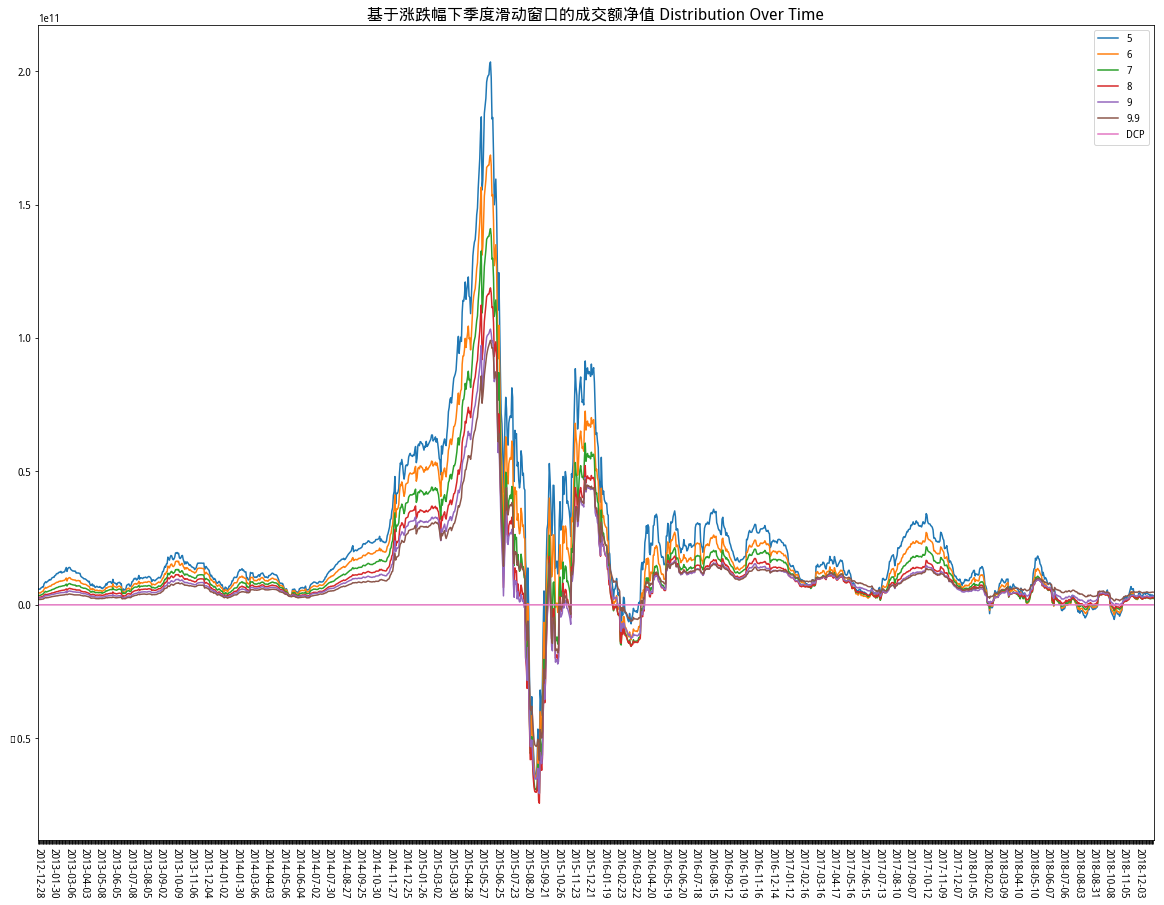

In [5]:
plt.figure(figsize=(20,15))
# print(Quantiles.iloc[:,0])
#p1 = plt.plot(range(len(interval7data.index)),interval7data['now_minus_prior_bigger_than0_sum'])
p1 = plt.plot(range(len(interval7data.index)),interval7data[ ['5','6','7','8','9','9.9','DCP'] ])
#p2 = plt.plot(range(len(interval7data.index)),interval7data['A_stock_index']/1000.00)

plt.title("基于涨跌幅下季度滑动窗口的成交额净值 Distribution Over Time", fontsize=16)
x_tick = [] 
for i in range(len(interval7data.index)): 
    if i%20 == 0:
        x_tick.append(interval7data.index[i])
    else: x_tick.append("") 
plt.legend(['5','6','7','8','9','9.9','DCP'])
plt.xticks(range(len(x_tick)), x_tick,rotation = -90)
plt.xlim(0,len(x_tick))
plt.show()

In [6]:
stock_list = get_index_stocks('000300.XSHG', date='2019-03-06')

In [8]:
qt = query(valuation.code, valuation.pb_ratio).filter(valuation.code.in_(stock_list))
df = get_fundamentals(qt, date='2019-03-06')
df.head()

,code,pb_ratio
0,000001.XSHE,1.0189
1,000002.XSHE,2.3608
2,000063.XSHE,5.8406
3,000069.XSHE,1.1025
4,000100.XSHE,1.7225


In [ ]:
def get_n_interval_data(codata=None,n=7):
    rectified_drop=[]
    for i in range(len(codata)):
        if i%n!=0:rectified_drop.append(codata.index[i])
    return codata.drop(rectified_drop)
interval7data = get_n_interval_data(Quantiles,n=1)#.replace([0],[0.01])
interval7data['now_minus_prior_bigger_than0_sum']=0;
interval7data['A_index_pc_n']=0
print ('interval7data',len(interval7data),'/',len(Quantiles))
#已经获得相应间隔数据
data_index = interval7data.index

for i in range(1, len(data_index) ):
    _d=(interval7data.iloc[i]-interval7data.iloc[i-1])#/interval7data.iloc[i]*100
    #print( _d);
    interval7data.loc[data_index[i],'now_minus_prior_bigger_than0_sum']\
                =sum([1 if j>0 else 0 for j in _d[[str(qt)for qt in Qt]].tolist() ] )
    print(_d['A_stock_index'])
    interval7data.loc[data_index[i-1],'A_index_pc_n']=int(_d['A_stock_index'].item())
    #print (interval7data.iloc[i],interval7data.iloc[i-1]);raise
print(interval7data)
xy_matrix = interval7data.iloc[np.random.permutation(len(interval7data))]
xy_matrix = xy_matrix[ [str(qt)for qt in Qt]+Qt_columns+ ['now_minus_prior_bigger_than0_sum','A_index_pc_n'] ]
as_labels_nums = len( set(xy_matrix['A_index_pc_n'].tolist()) )
xy_matrix = xy_matrix.as_matrix()
print('xy_matrix',len(xy_matrix) )

In [18]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
import numpy as np  
rf=RandomForestRegressor()#这里使用了默认的参数设置
line=int(len(xy_matrix)*5/6)
print('xy_matrix',xy_matrix.shape,'train line',line)
batch_x, batch_y = xy_matrix[0:line,0:-1],xy_matrix[0:line,[-1]].flatten()
rf.fit(batch_x,batch_y)#进行模型的训练
# Test Model
test_x, test_y = xy_matrix[line:,0:-1],xy_matrix[line:,[-1]].flatten()
instance=rf.predict(test_x) 
print('instance 0 prediction',type(instance),instance.shape ) 
result = (test_y*instance)
print('wrong rate',sum([-1 if i<0 else 0 for i in result]),'/',len(result) )
 

xy_matrix (417, 24) train line 347
instance 0 prediction <class 'numpy.ndarray'> (70,)
wrong rate -9 / 70


In [ ]:
from jqlib.technical_analysis import *
from sklearn.model_selection import train_test_split
from tensorflow.python.ops import resources
from tensorflow.contrib.tensor_forest.python import tensor_forest
import tensorflow as tf
# Parameters
num_steps = 500 # Total steps to train
batch_size = 20 # The number of samples per batch
num_classes = as_labels_nums
num_features = len(Qt+Qt_columns)+1
num_trees = 4
max_nodes = 1000
print(num_classes,num_features)
# Input and Target data
x = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
y = tf.placeholder(tf.int32, shape=[None])
 
# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes).fill()
 
# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)
# Get training graph and loss
train_op = forest_graph.training_graph(x, y)
loss_op = forest_graph.training_loss(x, y)
 
# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(x)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))
# Start TensorFlow session
sess = tf.train.MonitoredSession()
# Run the initializer
sess.run(init_vars)



12 23
INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'split_finish_name': 'basic', 'inference_tree_paths': False, 'param_file': None, 'pruning_type': 0, 'prune_every_samples': 0, 'stats_model_type': 0, 'max_fertile_nodes': 0, 'base_random_seed': 0, 'split_pruning_name': 'none', 'bagged_num_features': 23, 'split_name': 'less_or_equal', 'dominate_method': 'bootstrap', 'split_type': 0, 'early_finish_check_every_samples': 0, 'checkpoint_stats': False, 'split_after_samples': 250, 'leaf_model_type': 0, 'num_classes': 12, 'collate_examples': False, 'num_trees': 4, 'finish_type': 0, 'num_splits_to_consider': 10, 'model_name': 'all_dense', 'num_outputs': 1, 'use_running_stats_method': False, 'dominate_fraction': 0.99, 'bagging_fraction': 1.0, 'initialize_average_splits': False, 'regression': False, 'num_features': 23, 'valid_leaf_threshold': 1, 'num_output_columns': 13, 'max_nodes': 1000, 'feature_bagging_fraction': 1.0, 'bagged_features': None}
INFO:tensorflow:Graph was fi

In [ ]:
# Training
for i in range(1):
    line=int(len(xy_matrix)*5/6)
    print('xy_matrix',xy_matrix.shape,'line',line)
    batch_x, batch_y = xy_matrix[0:line,0:-1],xy_matrix[0:line,[-1]].flatten()
    print('batch_x',type(batch_x),batch_x.shape)
    sess.run([train_op,loss_op],feed_dict={x: batch_x, y: batch_y})
    print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

# Test Model
test_x, test_y = xy_matrix[line:,0:-1],xy_matrix[line:,[-1]].flatten()
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={x: test_x, y: test_y}))